In [2]:
import pywinauto as pwa
import xlwings as xw

import win32gui
import win32ui
import win32con

In [8]:
def find_browser():
    browsers = []
    def winEnumHandler(hwnd, ctx):
        if win32gui.IsWindowVisible(hwnd):
            n = win32gui.GetWindowText(hwnd)
            #print(n)
            if n =='Сервисы - Федеральная служба судебных приставов — Профиль 1: Microsoft​ Edge':
                browsers.append(hwnd)
    win32gui.EnumWindows(winEnumHandler, None)
    return browsers

In [79]:
import numpy as np
import cv2

from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder
from mltu.configs import BaseModelConfigs
import typing

import os

class ImageToWordModel(OnnxInferenceModel):
    def __init__(self, char_list: typing.Union[str, list], *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.char_list = char_list

    def predict(self, image: np.ndarray):
        image = cv2.resize(image, self.input_shape[:2][::-1])

        image_pred = np.expand_dims(image, axis=0).astype(np.float32)

        preds = self.model.run(None, {self.input_name: image_pred})[0]

        text = ctc_decoder(preds, self.char_list)[0]

        return text

def get_model():
    path = str(os.path.abspath(os.getcwd()))
    configs = BaseModelConfigs.load(path + "/configs.yaml")
    model = ImageToWordModel(model_path=configs.model_path, char_list=configs.vocab)
    return model

In [81]:
model = get_model()

In [12]:
hwnd=find_browser()[0]

In [15]:
appUIA=pwa.Application(backend='uia').connect(handle=hwnd)
mainUIA=appUIA.window(handle=hwnd)

In [16]:
mainUIA.descendants(title='Поиск по номеру ИП')[0].invoke()

<uia_controls.ButtonWrapper - 'Поиск по номеру ИП', RadioButton, -5587598007643804966>

In [113]:
#test_ip='38709/18/26030-ИП'
mainUIA.descendants(control_type='Button', title='Найти')

[<uia_controls.ButtonWrapper - 'Найти', Button, 2225331433161793765>]

In [22]:
mainUIA.descendants(control_type='Button', title='Найти')[0].invoke()

<uia_controls.ButtonWrapper - 'Найти', Button, 4823980421158977087>

In [85]:
import numpy as np
import cv2
from time import sleep
def solve_captcha():
    send_btn = mainUIA.descendants(control_type='Button', title='Отправить')
    while len(send_btn) != 0
        img = mainUIA.descendants(control_type='Image')[-1].capture_as_image()
        cv_image = np.array(img)
        padding = 0
        while True:
            if list(cv_image[cv_image.shape[0]//2, padding]) == [255,255,255] or list(cv_image[cv_image.shape[0]//2, padding]) == [140,140,140]:
                padding+=1
            else:
                break
        cv_image_fixed = cv_image[padding:cv_image.shape[0]-padding, padding:cv_image.shape[1]-padding, :]
        cv_image_fixed_scaled = cv2.resize(cv_image_fixed, (200, 60))
        ans = model.predict(cv_image_fixed_scaled)
        mainUIA.descendants(control_type='Edit')[-2].set_edit_text(ans)
        send_btn[0].invoke()
        sleep(1)
    #return model.predict(cv_image_fixed_scaled)

In [86]:
solve_captcha()

In [109]:
def get_dt():
    elems = mainUIA.descendants()
    for i in range(len(elems)):
        if elems[i].window_text() == 'Дата, причина окончания или прекращения ИП (статья, часть, пункт основания)':
            return elems[i+9].window_text()
    return ''

In [110]:
get_dt()

'17.01.2023 ст. 46 ч. 1 п. 3'

In [103]:
mainUIA.descendants()[2].window_text()

'Сервисы - Федеральная служба судебных приставов: Microsoft Edge'

In [96]:
img = mainUIA.descendants(control_type='Image')[-1].capture_as_image()

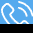

In [97]:
img

In [70]:
import numpy as np
import cv2
cv_image = np.array(img)

In [71]:
padding = 0
while True:
    if list(cv_image[cv_image.shape[0]//2, padding]) == [255,255,255] or list(cv_image[cv_image.shape[0]//2, padding]) == [140,140,140]:
        padding+=1
    else:
        break

In [72]:
cv_image_fixed = cv_image[padding:cv_image.shape[0]-padding, padding:cv_image.shape[1]-padding, :]

In [73]:
cv_image.shape

(76, 241, 3)

In [74]:
cv_image_fixed.shape

(72, 237, 3)

In [75]:
cv_image_fixed_scaled = cv2.resize(cv_image_fixed, (200, 60))

In [76]:
cv_image_fixed_scaled.shape

(60, 200, 3)

In [82]:
#import requests
#response = requests.post('http://127.0.0.1:8080/captcha', files={'captcha_image': get_image_handler(cv_image_fixed_scaled)})
ans = model.predict(cv_image_fixed_scaled)

'тд9в'

In [24]:
mainUIA.descendants(control_type='Edit')[-2].set_edit_text(ans)

<uia_controls.EditWrapper - '￼', Edit, 3107238147746970264>

In [116]:
mainUIA.descendants(title='Ваш запрос обрабатывается')

[<uia_controls.StaticWrapper - 'Ваш запрос обрабатывается', Static, 5803799566624461690>]

In [114]:
mainUIA.descendants()

[<uiawrapper.UIAWrapper - '', Pane, 5247415800147687455>,
 <uiawrapper.UIAWrapper - '', Pane, 1186459332694474521>,
 <uiawrapper.UIAWrapper - 'Сервисы - Федеральная служба судебных приставов: Microsoft Edge', Pane, 9043568135685549638>,
 <uiawrapper.UIAWrapper - '', Pane, -7973673301686318882>,
 <uiawrapper.UIAWrapper - '', Pane, -1989677088623621720>,
 <uiawrapper.UIAWrapper - '', Pane, -5706325555772606155>,
 <uia_controls.ButtonWrapper - 'Свернуть', Button, 3678151590313778690>,
 <uia_controls.ButtonWrapper - 'Развернуть', Button, -1753310971191776076>,
 <uia_controls.ButtonWrapper - 'Закрыть', Button, -2922534899917540086>,
 <uiawrapper.UIAWrapper - '', Pane, 7062690796550750745>,
 <uiawrapper.UIAWrapper - '', Pane, 4288799183144478982>,
 <uia_controls.ButtonWrapper - 'Профиль Профиль 1, войдите в систему', Button, -261876824002793992>,
 <uiawrapper.UIAWrapper - '', Pane, -5419047130165150536>,
 <uia_controls.TabControlWrapper - 'Панель вкладок', TabControl, 6627247040596007002>,
 